# Modelos de regresión

**Autor/es:**
+ Martín Castro Morales
+ Emilio Alarcon

**Correos Electrónicos:**
+ martin.castro2101@alumnos.ubiobio.cl
+ emilio.alarcon2101@alumnos.ubiobio.cl

**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción


In [7]:
##Descargar el archivo a la carpeta data
#!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/walmart.csv.zip

###Descomprimir el archivo directamente dentro de la carpeta data
#!unzip -q walmart.csv.zip

###Eliminar el archivo zip
#!rm walmart.csv.zip

### Eliminar la carpeta __MACOSX si se creó
#!rm -rf __MACOSX

# Descripción de la data

El conjunto de datos proporciona información sobre:
+ Store: número de identificación de la tienda.
+ Date: semana en la que ocurrieron las ventas.
+ Weekly_Sales: monto total de ventas en esa tienda durante la semana.
+ Holiday_Flag: Un indicador binario que muestra si la semana coincide con un feriado importante.
+ Temperature: temperatura registrada en el día de la venta.
+ Fuel_Price: El precio del combustible en la región.
+ CPI: índice de precios al consumidor en la región.
+ Unemployment: tasa de desempleo prevalente en ese momento.
+ Event_Type: tipo de evento asociado a la semana, como Super Bowl, Labour Day, Thanksgiving, Christmas o semana normal.



# Contexto del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

# Objetivo

Desarrollar modelos de regresión que permitan predecir el monto de las ventas semanales para cada tienda, basándose en variables que reflejan tanto factores económicos como eventos estacionales y externos. Esta predicción permitirá a la cadena anticiparse a fluctuaciones en la demanda, optimizando así su cadena de suministro y maximizando la eficiencia operativa.

# Preparación del entorno

In [4]:
# Escriba su código acá
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle
import json

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


# Carga de la data

In [9]:
# Escriba su código acá
frame = pd.read_csv("walmart.csv", sep=",")
frame.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,Normal


# Fase 1 - Comprensión del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

Text(0.5, 1.0, 'Predicciones')

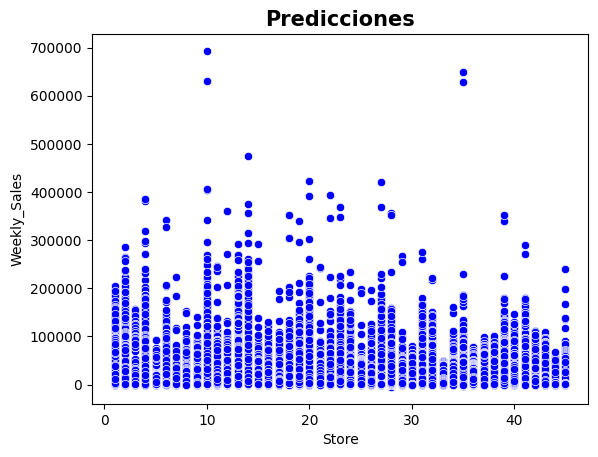

In [10]:
sb.scatterplot(x=frame.Store , y=frame.Weekly_Sales, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold")

# Fase 2 - Comprensión de los datos

In [11]:
# Escriba su código acá
# Eliminación
df_final = frame
df_final.drop(df_final.query('Weekly_Sales < 0').index, inplace=True)
df_final.drop(df_final.query('Weekly_Sales > 300000').index, inplace=True)

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420251 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    420251 non-null  int64  
 1   Store         420251 non-null  int64  
 2   Date          420251 non-null  object 
 3   IsHoliday     420251 non-null  int64  
 4   Dept          420251 non-null  float64
 5   Weekly_Sales  420251 non-null  float64
 6   Temperature   420251 non-null  float64
 7   Fuel_Price    420251 non-null  float64
 8   MarkDown1     420251 non-null  float64
 9   MarkDown2     420251 non-null  float64
 10  MarkDown3     420251 non-null  float64
 11  MarkDown4     420251 non-null  float64
 12  MarkDown5     420251 non-null  float64
 13  CPI           420251 non-null  float64
 14  Unemployment  420251 non-null  float64
 15  Type          420251 non-null  int64  
 16  Size          420251 non-null  int64  
 17  Event_Type    420251 non-null  object 
dtypes: float6

# Fase 3 - Preparación de los datos

In [13]:
# Escriba su código acá
corr_matrix = df_final[df_final.describe().columns].corr()
corr_matrix['Weekly_Sales'].sort_values(ascending = False)

Weekly_Sales    1.000000
Size            0.246580
Type            0.184277
Dept            0.149608
MarkDown5       0.051332
MarkDown1       0.048330
MarkDown4       0.038316
MarkDown3       0.031092
MarkDown2       0.021446
IsHoliday       0.008990
Fuel_Price      0.000412
Temperature    -0.001491
CPI            -0.020763
Unemployment   -0.026512
Unnamed: 0     -0.085051
Store          -0.085754
Name: Weekly_Sales, dtype: float64

# Tratamiento de variables Cualitativas
Type aunque es una variable cualitativa, esta ya esta convertida a un tipo 
de forma similar al metodo 6, Ordinal Encoding, Por lo que voy a convertir
Event_type ya que solo hay dos variables de tipo obj y Date tiene muchos valore lo que dificulta su analisis, para el caso de Date seria una buena idea separarlo por mes para simplificar el analisis. De todas formas este muestra poca correlacion con las ventas(mas abajo esta la correlacion). Supongo que tiene sentido usar el mismo metodo que ya tiene type, se supone que este metodo minimiza problemas introducidos por agregar una gran canditdad de variables, lo cual estaba dando problemas antes

In [14]:
original_dt_final = df_final.copy()
df_final = original_dt_final
categorical_features = df_final.describe(include = np.object_).columns
categorical_features
#¿Tiene sentido convertir Date?

Index(['Date', 'Event_Type'], dtype='object')

In [15]:
df_final.Event_Type.unique()

array(['Normal', 'Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas'],
      dtype=object)

In [16]:
# Usa OrdinalEncoder
for feature in categorical_features:
  encoder = OrdinalEncoder(categories=[df_final[feature].unique()])
  df_final[f'{feature}_codificado'] = encoder.fit_transform(df_final[[feature]])

#df_final.head()
df_final.Event_Type_codificado.unique()

array([0., 1., 2., 3., 4.])

In [17]:
# Escriba su código acá
corr_matrix = df_final[df_final.describe().columns].corr()
corr_matrix['Weekly_Sales'].sort_values(ascending = False)

Weekly_Sales             1.000000
Size                     0.246580
Type                     0.184277
Dept                     0.149608
MarkDown5                0.051332
MarkDown1                0.048330
MarkDown4                0.038316
MarkDown3                0.031092
MarkDown2                0.021446
IsHoliday                0.008990
Event_Type_codificado    0.008099
Fuel_Price               0.000412
Date_codificado         -0.000358
Temperature             -0.001491
CPI                     -0.020763
Unemployment            -0.026512
Unnamed: 0              -0.085051
Store                   -0.085754
Name: Weekly_Sales, dtype: float64

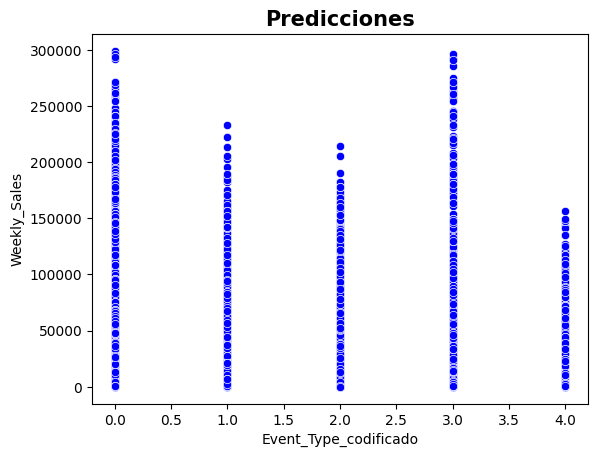

In [18]:
sb.scatterplot(x=df_final.Event_Type_codificado , y=df_final.Weekly_Sales, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

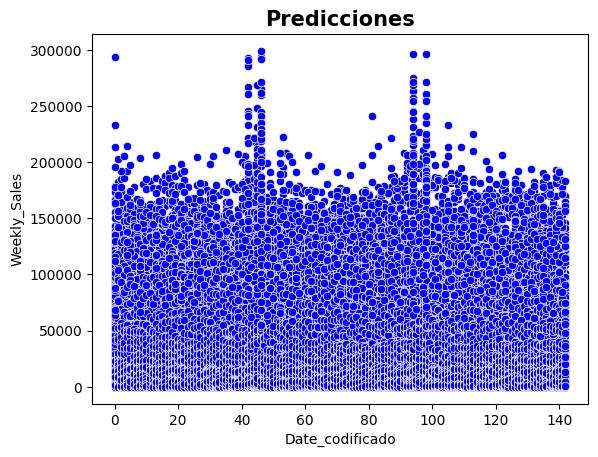

In [19]:
sb.scatterplot(x=df_final.Date_codificado , y=df_final.Weekly_Sales, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

# Fase 4 - Modelamiento

## Variante 1 - Uso sólo de variables numéricas

In [20]:
# Escriba su código acá

X = df_final[['Dept', "Size", "CPI"]]
print(X)
y = df_final['Weekly_Sales']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)
X_train1 = X_train

        Dept    Size         CPI
0        1.0  151315  211.096358
1       26.0  151315  211.096358
2       17.0  151315  211.096358
3       45.0  151315  211.096358
4       28.0  151315  211.096358
...      ...     ...         ...
421565  13.0  118221  192.308899
421566  16.0  118221  192.308899
421567  32.0  118221  192.308899
421568  83.0  118221  192.308899
421569  98.0  118221  192.308899

[420251 rows x 3 columns]
0         24924.50
1         11737.12
2         13223.76
3            37.44
4          1085.29
            ...   
421565    26240.14
421566     2660.02
421567     4131.54
421568      717.82
421569     1076.80
Name: Weekly_Sales, Length: 420251, dtype: float64


In [21]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  return f"""Modelo de regresión {algoritmo}
   {score :.2%} de la variabilidad en las ventas semanales se puede explicar utilizando las {len(caracteristicas)} características
   Características elegidas :{caracteristicas.values}."""

In [22]:
# Escriba su código acá
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)

LinearRegression()

In [23]:
# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 8.40%
R squared of the Linear Regression on test set: 8.29%


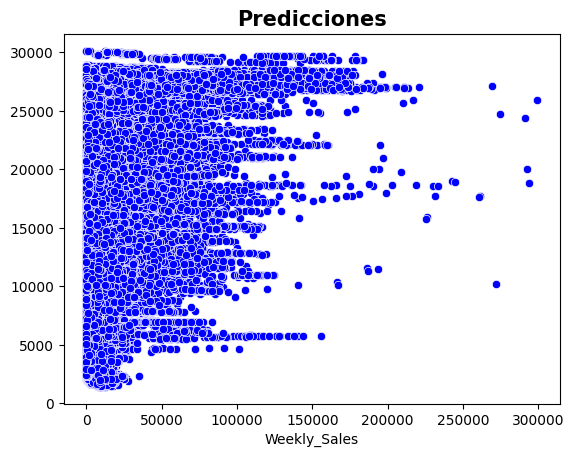

In [24]:
# Realiza predicciones
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

In [25]:
# Guarda resultados
model_lin_score = linreg.score(X_train, y_train)
model_lin_testscore = linreg.score(X_test, y_test)
y_pred_lin = linreg.predict(X_test)
model_lin_MAE = mean_absolute_error(y_test, y_pred_lin)
model_lin_MSLE = mean_squared_log_error(y_test, y_pred_lin)

history_var1 = {"LinearRegression" : [
    linreg, 
    model_lin_score,
    model_lin_testscore,
    str(model_lin_MAE),
    str(model_lin_MSLE)
    ]}

In [26]:
# Escriba su código acá
# Creación del modelo
model_tree = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=29)

In [27]:
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 99.54%
R squared of the Decision Tree Regressor on test set: 88.48%


Text(0.5, 1.0, 'Predicciones con DecisionTree')

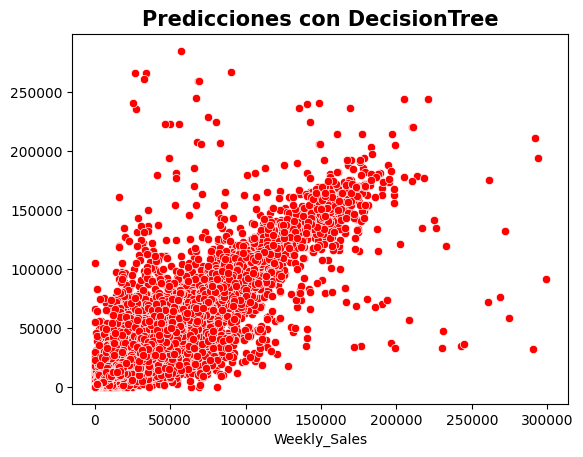

In [28]:
# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold")

In [29]:
# Guarda resultados
model_tree_score = model_tree.score(X_train, y_train)
model_tree_testscore = model_tree.score(X_test, y_test)
model_tree_MAE = mean_absolute_error(y_test, y_pred_tree)
model_tree_MSLE = mean_squared_log_error(y_test, y_pred_tree)
history_var1["DecisionTreeRegressor"] = [
    model_tree, 
    model_tree_score,
    model_tree_testscore,
    str(model_tree_MAE),
    str(model_tree_MSLE)
    ]

In [30]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=29)

In [31]:

# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(model_rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(model_rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 98.63%
R squared of the Random Forest Regressor on test set: 91.71%


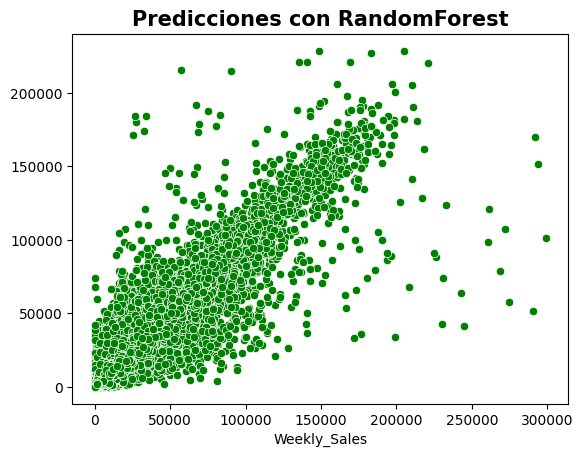

In [32]:
y_pred_rf = model_rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

In [33]:
model_rf_score = model_rf.score(X_train, y_train)
model_rf_testscore = model_rf.score(X_test, y_test)
y_pred_rf = model_rf.predict(X_test)
model_rf_MAE = mean_absolute_error(y_test, y_pred_rf)
model_rf_MSLE = mean_squared_log_error(y_test, y_pred_rf)
history_var1["RandomForestRegressor"] = [
    model_rf, 
    model_rf_score,
    model_rf_testscore,
    str(model_rf_MAE),
    str(model_rf_MSLE)]

## Variante 2 - Uso de variables numéricas y categórica


In [34]:
# Escriba su código acá
X = df_final[['Dept', "Size", "Event_Type_codificado", "Type"]]
print(X)
y = df_final['Weekly_Sales']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)

        Dept    Size  Event_Type_codificado  Type
0        1.0  151315                    0.0     3
1       26.0  151315                    0.0     3
2       17.0  151315                    0.0     3
3       45.0  151315                    0.0     3
4       28.0  151315                    0.0     3
...      ...     ...                    ...   ...
421565  13.0  118221                    0.0     2
421566  16.0  118221                    0.0     2
421567  32.0  118221                    0.0     2
421568  83.0  118221                    0.0     2
421569  98.0  118221                    0.0     2

[420251 rows x 4 columns]
0         24924.50
1         11737.12
2         13223.76
3            37.44
4          1085.29
            ...   
421565    26240.14
421566     2660.02
421567     4131.54
421568      717.82
421569     1076.80
Name: Weekly_Sales, Length: 420251, dtype: float64


In [35]:
# Escriba su código acá
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)
# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

model_lin_score = linreg.score(X_train, y_train)
model_lin_testscore = linreg.score(X_test, y_test)
y_pred_lin = linreg.predict(X_test)
model_lin_MAE = mean_absolute_error(y_test, y_pred_lin)
model_lin_MSLE = mean_squared_log_error(y_test, y_pred_lin)

# Guarda resultados
history_var2 = {"LinearRegression" : [
    linreg, 
    model_lin_score,
    model_lin_testscore,
    str(model_lin_MAE),
    str(model_lin_MSLE)
    ]}

R squared of the Linear Regression on training set: 8.44%
R squared of the Linear Regression on test set: 8.34%


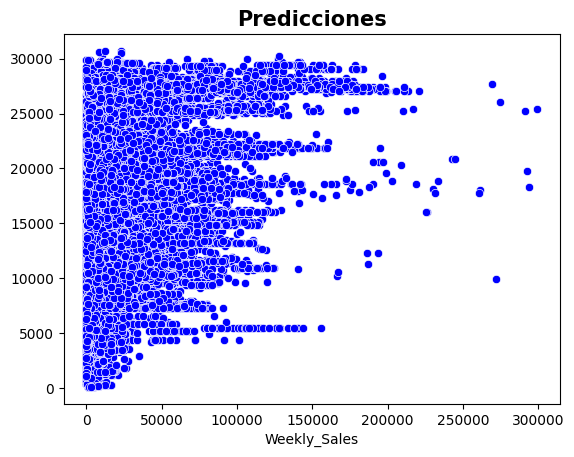

In [36]:
# Realiza predicciones
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

In [37]:
# Escriba su código acá
# Creación del modelo
model_tree = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
model_tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=29)

In [38]:
model_tree_score = model_tree.score(X_train, y_train)
model_tree_testscore = model_tree.score(X_test, y_test)
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))
y_pred_tree = model_tree.predict(X_test)
model_tree_MAE = mean_absolute_error(y_test, y_pred_tree)
model_tree_MSLE = mean_squared_log_error(y_test, y_pred_tree)
print(model_tree_MAE)
print(model_tree_MSLE)
# Guarda resultados
history_var2["DecisionTreeRegressor"] = [
    model_tree, 
    model_tree_score,
    model_tree_testscore,
    str(model_tree_MAE),
    str(model_tree_MSLE)
    ]

R squared of the Decision Tree Regressor on training set: 93.05%
R squared of the Decision Tree Regressor on test set: 92.26%
2635.535001795692
0.42326710241937465


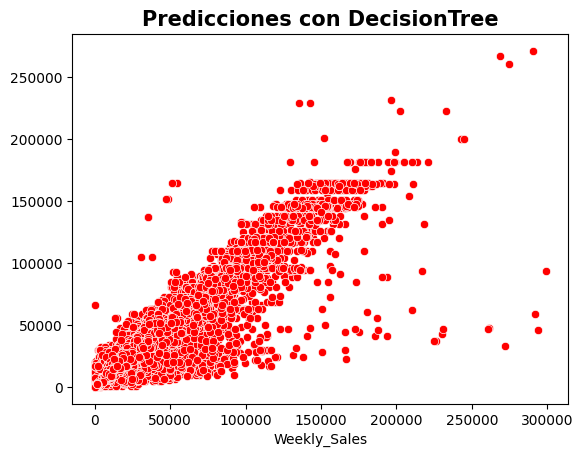

In [39]:
# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

In [40]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)
model_rf_score = model_rf.score(X_train, y_train)
model_rf_testscore = model_rf.score(X_test, y_test)


In [41]:
y_pred_rf = model_rf.predict(X_test)
model_rf_MAE = mean_absolute_error(y_test, y_pred_rf)
model_rf_MSLE = mean_squared_log_error(y_test, y_pred_rf)

# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(model_rf_score))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(model_rf_testscore))
print("MAE: " + str(model_rf_MAE))
print("MSLE: " + str(model_rf_MSLE))
# Guarda resultados
history_var2["RandomForestRegressor"] = [
    model_rf, 
    model_rf_score,
    model_rf_testscore,
    str(model_rf_MAE),
    str(model_rf_MSLE)]

R squared of the Random Forest Regressor on training set: 93.02%
R squared of the Random Forest Regressor on test set: 92.35%
MAE: 2633.0713360495574
MSLE: 0.42678379984719395


In [42]:
history_var2

{'LinearRegression': [LinearRegression(),
  0.08436890694518817,
  0.0833759051363645,
  '14485.20371905258',
  '4.8400847141083405'],
 'DecisionTreeRegressor': [DecisionTreeRegressor(random_state=29),
  0.9305298944153234,
  0.9226428151399994,
  '2635.535001795692',
  '0.42326710241937465'],
 'RandomForestRegressor': [RandomForestRegressor(random_state=29),
  0.9302237167983518,
  0.9234835144500196,
  '2633.0713360495574',
  '0.42678379984719395']}

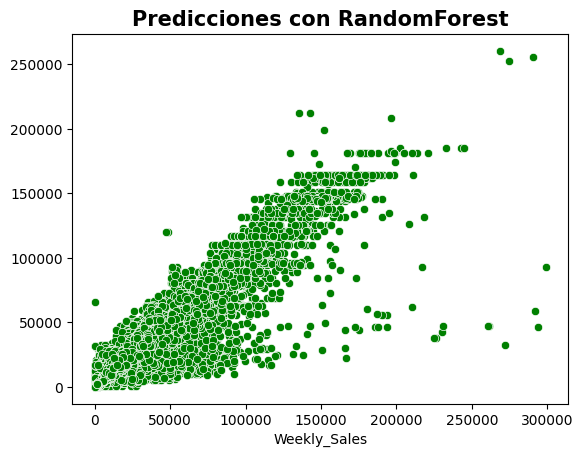

In [43]:
y_pred_rf = model_rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

# Fase 5 - Evaluación

## Variante 1 - Uso sólo de variables numéricas

In [44]:
def mae_interpretacion(modelo : str, value : float):
  print("El moodelo " + str(modelo) + "pudo predecir las ventas semanales de cada supermercado en el conjunto de prueba con un error de ± $" +  str(value) + "de las ventas reales.")

def msle_interpretacion(modelo : str, value : float):
  print(f"El modelo '{modelo}' pudo predecir las ventas de cada supermercado en el conjunto de prueba con un error de ± {value} de las ventas reales.")

In [45]:

# Escriba su código acá
header = {
    "Modelo " : ["Linear Regresion", "DecisionTreeRegressor Tree", "RandomForestRegressor"],
    "R^2 train": [history_var1['LinearRegression'][1],
                  history_var1['DecisionTreeRegressor'][1],
                  history_var1['RandomForestRegressor'][1]
                  ],
    "R^Test":  [history_var1['LinearRegression'][2],
                history_var1['DecisionTreeRegressor'][2],
                history_var1['RandomForestRegressor'][2]
                ],
    "MAE": [
                history_var1['LinearRegression'][3],
                history_var1['DecisionTreeRegressor'][3],
                history_var1['RandomForestRegressor'][3]
            ],
    "MSLE": [
        history_var1['LinearRegression'][4],
        history_var1['DecisionTreeRegressor'][4],
        history_var1['RandomForestRegressor'][4]
    ]
}
pd_header = pd.DataFrame(data=header)
pd_header

,Modelo,R^2 train,R^Test,MAE,MSLE
0,Linear Regresion,0.083952,0.082899,14483.057595286256,4.839937183554654
1,DecisionTreeRegressor Tree,0.995376,0.884770,2807.980838861763,0.36737329222100407
2,RandomForestRegressor,0.986254,0.917091,2434.832228912222,0.29213691386244195


#### Entre los modelos de la variante 1
Se observa *overfitting* en los modelos de DecisionTreeRegresor y RandomForestRegresor,
Si se tuviera que elegir uno mejor seria Random forest ya que tiene menor overfitting y mejor rendimiento en el conjunto de prueba.


In [46]:
#Conclusiones del mejor modelo
print(interpretacion('RandomForestRegressor', X_train1.columns, history_var1['RandomForestRegressor'][2]))
mae_interpretacion('RandomForestRegressor', history_var1['RandomForestRegressor'][3])
msle_interpretacion('RandomForestRegressor', history_var1['RandomForestRegressor'][4])

Modelo de regresión RandomForestRegressor
   91.71% de la variabilidad en las ventas semanales se puede explicar utilizando las 3 características
   Características elegidas :['Dept' 'Size' 'CPI'].
El moodelo RandomForestRegressorpudo predecir las ventas semanales de cada supermercado en el conjunto de prueba con un error de ± $2434.832228912222de las ventas reales.
El modelo 'RandomForestRegressor' pudo predecir las ventas de cada supermercado en el conjunto de prueba con un error de ± 0.29213691386244195 de las ventas reales.


In [48]:
#save in pickle
best_model = history_var1['RandomForestRegressor'][0]
#best_model
file_model = open("mModel1.data", "wb")
pickle.dump(best_model, file_model)
file_model.close()

## Variante 2 - Uso de variables numéricas y categórica

In [49]:
# Escriba su código acá
header = {
    "Modelo " : ["Linear Regresion", "DecisionTreeRegressor Tree", "RandomForestRegressor"],
    "R^2 train": [history_var2['LinearRegression'][1],
                  history_var2['DecisionTreeRegressor'][1],
                  history_var2['RandomForestRegressor'][1]
                  ],
    "R^Test":  [history_var2['LinearRegression'][2],
                history_var2['DecisionTreeRegressor'][2],
                history_var2['RandomForestRegressor'][2]
                ],
    "MAE": [
                history_var2['LinearRegression'][3],
                history_var2['DecisionTreeRegressor'][3],
                history_var2['RandomForestRegressor'][3]
            ],
    "MSLE": [
        history_var2['LinearRegression'][4],
        history_var2['DecisionTreeRegressor'][4],
        history_var2['RandomForestRegressor'][4]
    ]
}
pd_header = pd.DataFrame(data=header)
pd_header

,Modelo,R^2 train,R^Test,MAE,MSLE
0,Linear Regresion,0.084369,0.083376,14485.20371905258,4.8400847141083405
1,DecisionTreeRegressor Tree,0.930530,0.922643,2635.535001795692,0.42326710241937465
2,RandomForestRegressor,0.930224,0.923484,2633.0713360495574,0.42678379984719395


#### Entre los modelos de la variante 2
Se puede ver que tanto DesicionTree y RandomForest tuvieron un rendimiento
similar. No presentan *overfitting* debido a que se observa un rendimiento similar 
(con diferencia menor a 1) entre los datos de entrenamiento y prueba.

No se podria decir que DecisionTree o RandomForest es mejor.

Sobre el MAE y el MSLE: Son muy similares por lo que no hay mucho que decir. Pero si hubiera una diferencia, se tiene que MSLE es una metrica que castiga mas la subestimacion que la sobreestimacion. En este caso de negocio probablemente se preferiria quedarse con inventario extra que perder ventas por lo que MSLE deberia tener un peso mayor en la desicion
https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

In [50]:

#Conclusiones del mejor modelo
print(interpretacion('RandomForestRegressor', X_train.columns, history_var2['RandomForestRegressor'][2]))
mae_interpretacion('RandomForestRegressor', history_var2['RandomForestRegressor'][3])
msle_interpretacion('RandomForestRegressor', history_var2['RandomForestRegressor'][4])

Modelo de regresión RandomForestRegressor
   92.35% de la variabilidad en las ventas semanales se puede explicar utilizando las 4 características
   Características elegidas :['Dept' 'Size' 'Event_Type_codificado' 'Type'].
El moodelo RandomForestRegressorpudo predecir las ventas semanales de cada supermercado en el conjunto de prueba con un error de ± $2633.0713360495574de las ventas reales.
El modelo 'RandomForestRegressor' pudo predecir las ventas de cada supermercado en el conjunto de prueba con un error de ± 0.42678379984719395 de las ventas reales.


In [51]:
#save in pickle
best_model = history_var2['RandomForestRegressor'][0]
#best_model
file_model = open("mModel2.data", "wb")
pickle.dump(best_model, file_model)
file_model.close()

# Fase 6 - Deployment

In [2]:
!wget https://raw.githubusercontent.com/MartinCastroMorales-mcm/Eval2/refs/heads/master/input1.json

--2024-10-07 09:32:59--  https://raw.githubusercontent.com/MartinCastroMorales-mcm/Eval2/refs/heads/master/input1.json
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.110.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 957 [text/plain]
Grabando a: «input1.json»

input1.json         100%[===================>]     957  --.-KB/s    en 0s      

2024-10-07 09:33:00 (29,5 MB/s) - «input1.json» guardado [957/957]



## Variante 1 - Uso sólo de variables numéricas

In [5]:
#Obtener modelo
import pickle
file_model = open('mModel1.data', 'rb')
mejor_modelo = pickle.load(file_model)

#Obtener datos
with open("input1.json", "r") as f:
    data = json.load(f)

print(data)

#Agregar columna de Event_Type
#Diccionario para transformar
dic = { 
    "Normal": 0, 
    "Super Bowl": 1,
    "Labour Day": 2,
    "Thanksgiving": 3,
    "Christmas": 4}

#Convertir a lista
def codificar(dic, row):
    #row['Event_Type_codificado'] = dic[row['Event_Type']]
    interesting_keys = ('Dept', 'Size', 'CPI')
    subdict = {x: row[x] for x in interesting_keys if x in row}
    #print("hello")
    subdict = list(subdict.values())
    #print(subdict)
    
    return subdict 
#print("data.values")
#print(data.values())
retjson = [] 
print("data")
print(data)
for mjson in data:
    print("json")
    print(mjson)
    row = codificar(dic, mjson)
    retjson_dic = mjson
    mlist = []
    mlist.append(row)
    print(mlist)
    prediccion = mejor_modelo.predict(mlist)
    retjson_dic['prediccion'] = prediccion[0]
    print(prediccion)
    retjson.append(retjson_dic)
print("retjson")
print(retjson)

with open("output1.json", "w") as f:
    json.dump(retjson, f)

[{'Unnamed': 137, 'Store': 1, 'Date': '2010-02-05', 'IsHoliday': 0, 'Dept': 1, 'Weekly_Sales': 11737.12, 'Temperature': 42.31, 'Fuel_Price': 2.572, 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 'CPI': 211.096358, 'Unemployment': 8.1068, 'Type': 3, 'Size': 151315, 'Event_Type': 'Normal'}, {'Unnamed': 137, 'Store': 1, 'Date': '2010-02-05', 'IsHoliday': 0, 'Dept': 1, 'Weekly_Sales': 11737.12, 'Temperature': 42.31, 'Fuel_Price': 2.572, 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 'CPI': 211.096358, 'Unemployment': 8.1068, 'Type': 3, 'Size': 151315, 'Event_Type': 'Christmas'}]
data
[{'Unnamed': 137, 'Store': 1, 'Date': '2010-02-05', 'IsHoliday': 0, 'Dept': 1, 'Weekly_Sales': 11737.12, 'Temperature': 42.31, 'Fuel_Price': 2.572, 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 'CPI': 211.096358, 'Unemployment': 8.1068, 'Type': 3, 'Size': 151315, 'Event_Type': 'Normal'}, {'Unnamed': 137, 'Store'

/home/martin/code/ia/eval2-2/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/martin/code/ia/eval2-2/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Variante 2 - Uso de variables numéricas y categórica

In [6]:
#Obtener modelo
import pickle
file_model = open('mModel2.data', 'rb')
mejor_modelo = pickle.load(file_model)

#Obtener datos
with open("input1.json", "r") as f:
    data = json.load(f)

print(data)

#Agregar columna de Event_Type
#Diccionario para transformar
dic = { 
    "Normal": 0, 
    "Super Bowl": 1,
    "Labour Day": 2,
    "Thanksgiving": 3,
    "Christmas": 4}

#Convertir a lista
def codificar(dic, row):
    row['Event_Type_codificado'] = dic[row['Event_Type']]
    interesting_keys = ('Dept', 'Size', 'Event_Type_codificado', "Type")
    subdict = {x: row[x] for x in interesting_keys if x in row}
    #print("hello")
    subdict = list(subdict.values())
    #print(subdict)
    
    return subdict 
#print("data.values")
#print(data.values())
retjson = [] 
print("data")
print(data)
for mjson in data:
    print("json")
    print(mjson)
    row = codificar(dic, mjson)
    retjson_dic = mjson
    mlist = []
    mlist.append(row)
    prediccion = mejor_modelo.predict(mlist)
    retjson_dic['prediccion'] = prediccion[0]
    print(prediccion)
    retjson.append(retjson_dic)
print("retjson")
print(retjson)

with open("output2.json", "w") as f:
    json.dump(retjson, f)


[{'Unnamed': 137, 'Store': 1, 'Date': '2010-02-05', 'IsHoliday': 0, 'Dept': 1, 'Weekly_Sales': 11737.12, 'Temperature': 42.31, 'Fuel_Price': 2.572, 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 'CPI': 211.096358, 'Unemployment': 8.1068, 'Type': 3, 'Size': 151315, 'Event_Type': 'Normal'}, {'Unnamed': 137, 'Store': 1, 'Date': '2010-02-05', 'IsHoliday': 0, 'Dept': 1, 'Weekly_Sales': 11737.12, 'Temperature': 42.31, 'Fuel_Price': 2.572, 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 'CPI': 211.096358, 'Unemployment': 8.1068, 'Type': 3, 'Size': 151315, 'Event_Type': 'Christmas'}]
data
[{'Unnamed': 137, 'Store': 1, 'Date': '2010-02-05', 'IsHoliday': 0, 'Dept': 1, 'Weekly_Sales': 11737.12, 'Temperature': 42.31, 'Fuel_Price': 2.572, 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 'CPI': 211.096358, 'Unemployment': 8.1068, 'Type': 3, 'Size': 151315, 'Event_Type': 'Normal'}, {'Unnamed': 137, 'Store'

/home/martin/code/ia/eval2-2/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/martin/code/ia/eval2-2/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Pregunta final

¿Qué modelo recomendaría utilizar para cumplir con el objetivo propuesto al inicio? Deberá justificar su respuesta

Los modelos de la variante 1 presentan *overfitting*, es decir tienen un 
rendimiento significativamente superior en el conjunto de entrenamiento que en el de 
pruebas por lo que se espera que este no tenga buen rendimiento en datos distintos a los de prueba.

Por el otro lado la variante 2 presenta una diferencia entre entrenamiento y prueba de 0,00674; por lo que podemos decir que no presenta *overfitting* y la variante 2 en RandomForest presenta 0.923484 de rendimiento